In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Ahora haremos lo mismo que en los otros incisos pero calculamos el ATT

In [80]:
# Elegimos la semilla
np.random.seed(263) # últimos tres dígitos del DNI

# Número de observaciones
n = 5000

# Generamos las edades para tratamiento y control
edad_tratamiento = np.random.normal(20, 2.5, int(n / 2))
edad_control = np.random.normal(25, 3, int(n / 2))
edad = np.concatenate((edad_tratamiento, edad_control))

# Generamos la experiencia para tratamiento y control
exper_tratamiento = np.random.normal(1.76, 0.5, int(n / 2))
exper_control = np.random.normal(2.3, 0.75, int(n / 2))
exper = np.concatenate((exper_tratamiento, exper_control))

# Variables centradas con respecto a la media
edad_c = edad - edad.mean()
exper_c = exper - exper.mean()

# Variables al cuadrado
edad_c2 = edad_c ** 2
exper_c2 = exper_c ** 2

# Producto cruzado
edadexper = edad_c * exper_c

# Variable de tratamiento
tratamiento = np.concatenate((np.ones(int(n / 2)), np.zeros(int(n / 2))))

# Error aleatorio
epsilon = np.random.normal(0, 0.5, n)

# Resultados potenciales
y0 = 15000 + 10.25 * edad_c + 10.5 * edad_c2 + 1000 * exper_c - 10.5 * exper_c2 + 500 * edadexper + epsilon
y1 = y0 + 2500 + 100 * edad_c + 1000 * exper_c

# Verdadero ATE y ATT
ate_verdadero = np.mean(y1 - y0)
att_verdadero = np.mean((y1 - y0)[tratamiento == 1])

print(f'El verdadero ATE es: {ate_verdadero:.2F}')
print(f'El verdadero ATT es: {att_verdadero:.2F}')

El verdadero ATE es: 2500.00
El verdadero ATT es: 1999.77


### Modelos homogéneos del inciso 1

In [81]:
# Listas para almacenar los resultados de las simulaciones
att_resultados_a = [] # Modelo a)
att_resultados_b = [] # Modelo b)

# Elegimos la semilla
np.random.seed(263) # últimos tres dígitos del DNI

# Realizamos las simulaciones
simulaciones = 1000
for _ in range(simulaciones):

    # Número de observaciones
    n = 5000

    # Generamos las edades para tratamiento y control
    edad_tratamiento = np.random.normal(20, 2.5, int(n / 2))
    edad_control = np.random.normal(25, 3, int(n / 2))
    edad = np.concatenate((edad_tratamiento, edad_control))

    # Generamos la experiencia para tratamiento y control
    exper_tratamiento = np.random.normal(1.76, 0.5, int(n / 2))
    exper_control = np.random.normal(2.3, 0.75, int(n / 2))
    exper = np.concatenate((exper_tratamiento, exper_control))

    # Variables centradas con respecto a la media
    edad_c = edad - edad.mean()
    exper_c = exper - exper.mean()

    # Variables al cuadrado
    edad_c2 = edad_c ** 2
    exper_c2 = exper_c ** 2

    # Producto cruzado
    edadexper = edad_c * exper_c

    # Variable de tratamiento
    tratamiento = np.concatenate((np.ones(int(n / 2)), np.zeros(int(n / 2))))

    # Error aleatorio
    epsilon = np.random.normal(0, 0.5, n)

    # Resultados potenciales
    y0 = 15000 + 10.25 * edad_c + 10.5 * edad_c2 + 1000 * exper_c - 10.5 * exper_c2 + 500 * edadexper + epsilon
    y1 = y0 + 2500 + 100 * edad_c + 1000 * exper_c
   
    # Modelo A: Efecto tratamiento homogéneo y regresión sin términos cuadráticos
    X_a = pd.DataFrame({'tratamiento': tratamiento, 'edad_c': edad_c, 'experiencia_c': exper_c})
    X_a = sm.add_constant(X_a) # Añadimos la constante al modelo
    y_a = y1 * tratamiento + y0 * (1 - tratamiento) # Construimos la variable
    
    #Estimamos el modelo
    model_a = sm.OLS(y_a, X_a).fit()
    att_a = model_a.params['tratamiento']
    att_resultados_a.append(att_a)

    # Modelo B: Efecto tratamiento homogéneo y regresión con términos cuadráticos e interacción
    X_b = pd.DataFrame({'tratamiento': tratamiento, 'edad_c': edad_c, 'edad_c2': edad_c2,
                            'experiencia_c': exper_c, 'experiencia_c2': exper_c2, 'edad_experiencia': edadexper})
    X_b = sm.add_constant(X_b) # Añadimos la constante al modelo
    y_b = y1 * tratamiento + y0 * (1 - tratamiento) # Construimos la variable dependiente

    # Estimamos el modelo
    model_b = sm.OLS(y_b, X_b).fit()
    att_b = model_b.params['tratamiento']
    att_resultados_b.append(att_b)

# Promedio de las estimaciones del ATE en ambas simulaciones
att_promedio_a = np.mean(att_resultados_a)
att_promedio_b = np.mean(att_resultados_b)

print(f'El promedio de la estimación del ATE en las {simulaciones} simulaciones para el modelo a) es: {att_promedio_a:.2F}')
print(f'El promedio de la estimación del ATE en las {simulaciones} simulaciones para el modelo b) es: {att_promedio_b:.2F}')

El promedio de la estimación del ATE en las 1000 simulaciones para el modelo a) es: 2752.84
El promedio de la estimación del ATE en las 1000 simulaciones para el modelo b) es: 2388.30


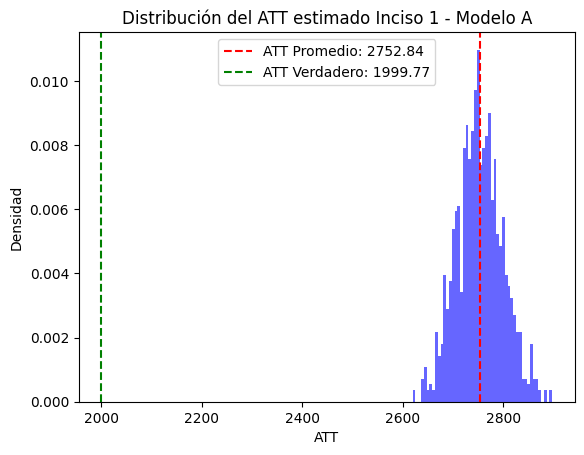

In [82]:
# Gráfico de densidad para el modelo A
plt.hist(att_resultados_a, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(x=att_promedio_a, color='red', linestyle='--', label=f'ATT Promedio: {att_promedio_a:.2f}')
plt.axvline(x=att_verdadero, color='green', linestyle='--', label=f'ATT Verdadero: {att_verdadero:.2f}')
plt.xlabel('ATT')
plt.ylabel('Densidad')
plt.title('Distribución del ATT estimado Inciso 1 - Modelo A')
plt.legend()
plt.show()

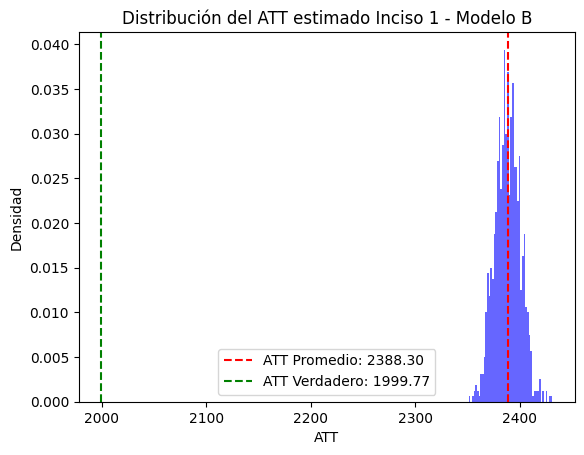

In [83]:
# Gráfico de densidad para el modelo B
plt.hist(att_resultados_b, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(x=att_promedio_b, color='red', linestyle='--', label=f'ATT Promedio: {att_promedio_b:.2f}')
plt.axvline(x=att_verdadero, color='green', linestyle='--', label=f'ATT Verdadero: {att_verdadero:.2f}')
plt.xlabel('ATT')
plt.ylabel('Densidad')
plt.title('Distribución del ATT estimado Inciso 1 - Modelo B')
plt.legend()
plt.show()

### Modelos saturados del inciso 2

In [74]:
# Listas para almacenar los resultados de las simulaciones
att_resultados_a = [] # Modelo a)
att_resultados_b = [] # Modelo b)

# Elegimos la semilla
np.random.seed(263) # últimos tres dígitos del DNI

# Realizamos las simulaciones
simulaciones = 1000
for _ in range(simulaciones):
    
    # Número de observaciones
    n = 5000

    # Generamos las edades para tratamiento y control
    edad_tratamiento = np.random.normal(20, 2.5, int(n / 2))
    edad_control = np.random.normal(25, 3, int(n / 2))
    edad = np.concatenate((edad_tratamiento, edad_control))

    # Generamos la experiencia para tratamiento y control
    exper_tratamiento = np.random.normal(1.76, 0.5, int(n / 2))
    exper_control = np.random.normal(2.3, 0.75, int(n / 2))
    exper = np.concatenate((exper_tratamiento, exper_control))

    # Variables centradas con respecto a la media
    edad_c = edad - edad.mean()
    exper_c = exper - exper.mean()

    # Variables al cuadrado
    edad_c2 = edad_c ** 2
    exper_c2 = exper_c ** 2

    # Producto cruzado
    edadexper = edad_c * exper_c

    # Variable de tratamiento
    tratamiento = np.concatenate((np.ones(int(n / 2)), np.zeros(int(n / 2))))

    # Error aleatorio
    epsilon = np.random.normal(0, 0.5, n)

    # Resultados potenciales
    y0 = 15000 + 10.25 * edad_c + 10.5 * edad_c2 + 1000 * exper_c - 10.5 * exper_c2 + 500 * edadexper + epsilon
    y1 = y0 + 2500 + 100 * edad_c + 1000 * exper_c
  
    # Modelo A: Saturación simple
    X_a = pd.DataFrame({'tratamiento': tratamiento, 'edad_c': edad_c, 'experiencia_c': exper_c, 
                        'tratedad': tratamiento*edad_c, 'tratexper': tratamiento*exper_c,
                        'edad_experiencia': edadexper})
    X_a = sm.add_constant(X_a) # Añadimos la constante al modelo
    y_a = y1 * tratamiento + y0 * (1 - tratamiento) # Construimos la variable dependiente
    model_a = sm.OLS(y_a, X_a).fit()

    # En este caso el ATT se calcula con el coeficiente de las interacciones del tratamiento multiplicado por la media de su variable en el grupo de tratamiento
    att_a = (model_a.params['tratamiento'] + model_a.params['tratedad']*np.mean(edad_c[tratamiento==1]) +
             model_a.params['tratexper']*np.mean(exper_c[tratamiento==1]) +
             model_a.params['edad_experiencia']*np.mean(edad_c[tratamiento==1])*np.mean(exper_c[tratamiento==1]))

    att_resultados_a.append(att_a)

    # Modelo B: Saturación completa
    X_b = pd.DataFrame({'tratamiento': tratamiento, 'edad_c': edad_c, 'edad_c2': edad_c2,
                        'experiencia_c': exper_c, 'experiencia_c2': exper_c2, 'edad_c2edad_c': edad_c2*edad_c,
                         'edadexper': edadexper, 'edad_cexper_c2': edad_c*exper_c2, 'edad_c2exper_c': edad_c2*exper_c,
                         'edad_c2exper_c2': edad_c2*exper_c2, 'exper_cexper_c2': exper_c*exper_c2,
                         'edad_c2edad_cexper_c': edad_c2*edad_c*exper_c, 'edad_c2edad_c_exper_c2': edad_c2*edad_c*exper_c2,
                         'tratedad_c': tratamiento*edad_c, 'tratedad_c2': tratamiento*edad_c2,
                         'tratexper_c': tratamiento*exper_c, 'tratexper_c2': tratamiento*exper_c2,
                         'tratedad_c2edad_c': tratamiento*edad_c2*edad_c, 
                         'tratedadexper': tratamiento*edadexper, 
                         'tratedad_cexper_c2': tratamiento*edad_c*exper_c2,
                         'tratedad_c2exper_c': tratamiento*edad_c2*exper_c,
                         'tratedad_c2exper_c2': tratamiento*edad_c2*exper_c2,
                         'tratexper_cexper_c2': tratamiento*exper_c*exper_c2,
                         'tratedad_c2edad_cexper_c': tratamiento*edad_c2*edad_c*exper_c,
                         'tratedad_c2edad_cexper_c2': tratamiento*edad_c2*edad_c*exper_c2})
    X_b = sm.add_constant(X_b) # Añadimos la constante al modelo
    y_b = y1 * tratamiento + y0 * (1 - tratamiento) # Construimos la variable dependiente
    model_b = sm.OLS(y_b, X_b).fit()

    # En este caso el ATT se calcula con el coeficiente de las interacciones del tratamiento multiplicado por la media de su variable en el grupo de tratamiento
    att_b = (model_b.params['tratamiento'] + model_b.params['tratedad_c']*np.mean(edad_c[tratamiento==1]) +
             model_b.params['tratedad_c2']*np.mean(edad_c2[tratamiento==1]) + 
             model_b.params['tratexper_c']*np.mean(exper_c[tratamiento==1]) +
             model_b.params['tratexper_c2']*np.mean(exper_c2[tratamiento==1]) + 
             model_b.params['tratedad_c2edad_c']*np.mean(edad_c2[tratamiento==1])*np.mean(edad_c[tratamiento==1]) + 
             model_b.params['tratedadexper']*np.mean(edadexper[tratamiento==1]) +
             model_b.params['tratedad_cexper_c2']*np.mean(edad_c[tratamiento==1])*np.mean(exper_c2[tratamiento==1]) + 
             model_b.params['tratedad_c2exper_c']*np.mean(edad_c2[tratamiento==1])*np.mean(exper_c[tratamiento==1]) +
             model_b.params['tratedad_c2exper_c2']*np.mean(edad_c2[tratamiento==1])*np.mean(exper_c2[tratamiento==1]) +
             model_b.params['tratexper_cexper_c2']*np.mean(exper_c[tratamiento==1])*np.mean(exper_c2[tratamiento==1]) +
             model_b.params['tratedad_c2edad_cexper_c']*np.mean(edad_c2[tratamiento==1])*np.mean(edad_c[tratamiento==1])*np.mean(exper_c[tratamiento==1]) +
             model_b.params['tratedad_c2edad_cexper_c2']*np.mean(edad_c2[tratamiento==1])*np.mean(edad_c[tratamiento==1])*np.mean(exper_c2[tratamiento==1]))
    
    att_resultados_b.append(att_b)

# Promedio de las estimaciones del ATE en ambas simulaciones
att_promedio_a = np.mean(att_resultados_a)
att_promedio_b = np.mean(att_resultados_b)

print(f'El promedio de la estimación del ATE en las {simulaciones} simulaciones para el modelo a) es: {att_promedio_a:.4F}')
print(f'El promedio de la estimación del ATE en las {simulaciones} simulaciones para el modelo b) es: {att_promedio_b:.4F}')


El promedio de la estimación del ATE en las 1000 simulaciones para el modelo a) es: 2551.4769
El promedio de la estimación del ATE en las 1000 simulaciones para el modelo b) es: 1979.7989


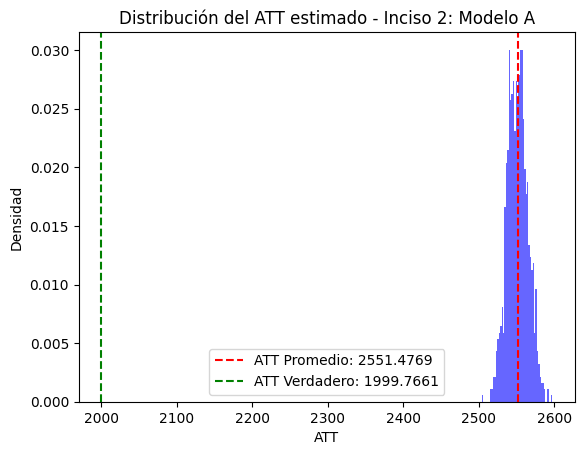

In [75]:
# Gráfico de densidad para el modelo A
plt.hist(att_resultados_a, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(x=att_promedio_a, color='red', linestyle='--', label=f'ATT Promedio: {att_promedio_a:.4f}')
plt.axvline(x=att_verdadero, color='green', linestyle='--', label=f'ATT Verdadero: {att_verdadero:.4f}')
plt.xlabel('ATT')
plt.ylabel('Densidad')
plt.title('Distribución del ATT estimado - Inciso 2: Modelo A')
plt.legend()
plt.show()

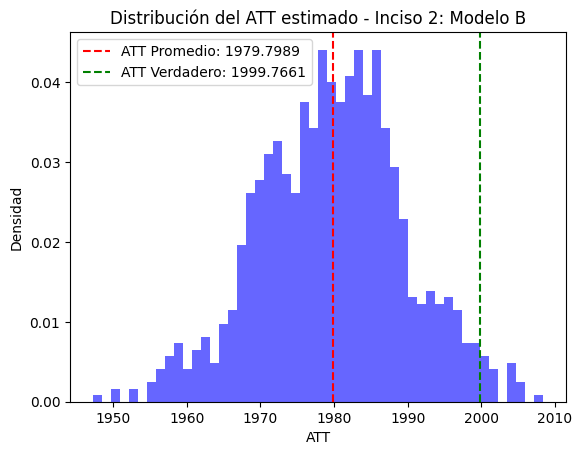

In [76]:
# Gráfico de densidad para el modelo B
plt.hist(att_resultados_b, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(x=att_promedio_b, color='red', linestyle='--', label=f'ATT Promedio: {att_promedio_b:.4f}')
plt.axvline(x=att_verdadero, color='green', linestyle='--', label=f'ATT Verdadero: {att_verdadero:.4f}')
plt.xlabel('ATT')
plt.ylabel('Densidad')
plt.title('Distribución del ATT estimado - Inciso 2: Modelo B')
plt.legend()
plt.show()